In [116]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [85]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [87]:
n, w, h = x_train.shape
x_train = x_train.reshape(n, w, h, 1)

m = x_test.shape[0]
x_test = x_test.reshape(m, w, h, 1)

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


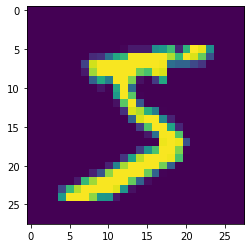

In [89]:
plt.imshow(x_train[0][:,:,0])

## Types and normalization

In [90]:
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test/255

## One hot encoding

In [91]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [92]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [93]:
y_train_cat = to_categorical(y_train, num_classes=10, dtype='float32')

In [94]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [170]:
y_test_cat = to_categorical(y_test, num_classes=10, dtype='float32')

In [121]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, 3, activation='relu', input_shape=input_shape))
    #print("con2d_1: ", model.output_shape)
    model.add(Conv2D(32, 3, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [122]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)             

In [124]:
model = build_model(x_train.shape[1:])
hist = model.fit(x_train, y_train_cat, \
         epochs=10, \
         batch_size=32
         )

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1992 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0831 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0609 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0535 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0458 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0385 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0315 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [161]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [162]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [163]:
hist.history['loss']

[0.19923384487628937,
 0.08307336270809174,
 0.06092442199587822,
 0.05354629456996918,
 0.04576913267374039,
 0.03846137225627899,
 0.03378494083881378,
 0.03153505176305771,
 0.030253132805228233,
 0.02523321658372879]

In [165]:
epochs = list(range(10))

In [166]:
epochs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Train Acc')

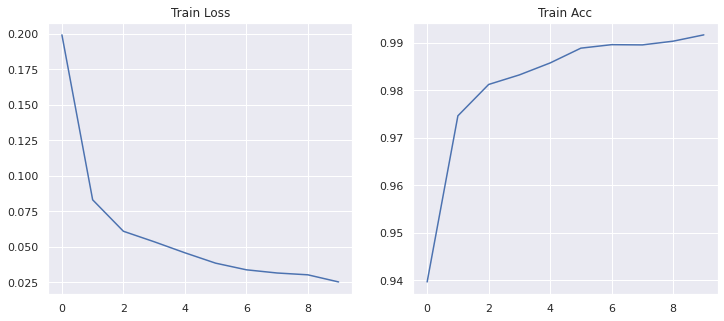

In [169]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.lineplot(epochs, hist.history['loss'], ax=ax1)
ax1.set_title("Train Loss")
sns.lineplot(epochs, hist.history['accuracy'], ax=ax2)
ax2.set_title("Train Acc")

# plt.plot(hist.history['loss'])
# plt.title("Train Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")

In [174]:
eval_loss, eval_acc = model.evaluate(x_test,y_test_cat)
print(f"Eval_loss: {eval_loss}, Eval_acc: {eval_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0283 - accuracy: 0.9923
eval_loss: 0.02832367829978466, eval_acc: 0.9922999739646912


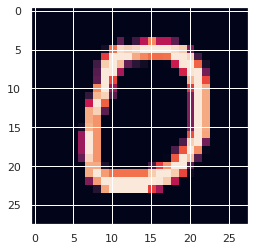

In [175]:
plt.imshow(x_test[10][:,:,0])

Text(0.5, 1.0, '1')

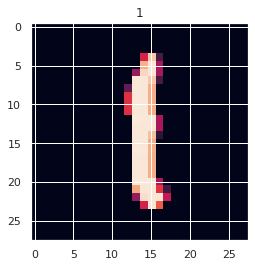

In [186]:
import random
index = random.randint(0,x_test.shape[0])
pred = model.predict(x_test[index].reshape(1, w, h, 1))
#pred.sum()
pred_ind = pred.argmax()
plt.imshow(x_test[index][:,:,0])
plt.title(str(pred_ind))